In [1]:
import csv

In [2]:
import numpy as np
import scipy
from scipy.stats import norm
import math
import random
import operator

In [3]:
class knn:
    """kNearest Neighbour classification implementation"""
    
    def __init__(self,k):
        self.k = k
        
    def euclideanDistance(self,data1,data2,n):
        distance = 0
        for i in range(0,n):
            distance+=np.square(data1[i]-data2[i])
        return np.sqrt(distance)
    
    def manhattanDistance(self,data1,data2,n):
        distance = 0
        for i in range(n):
            distance+=abs(data1[i]-data2[i])
        return distance
    
    def hammingDistance(self,data1,data2,n):
        distance = 0
        for i in range(n):
            if data1[i]==data2[i]:
                distance+=1
        return distance
    
    ##using euclidean distance for now
    def getNeighbours(self,dataset,data):
        distances = []
        length = len(data)
        for i in range(0,len(dataset)):
            ##change the below line for different distances
            dist = self.euclideanDistance(data,dataset[i],length)
            distances.append((dataset[i],dist))
        distances.sort(key=operator.itemgetter(1))
        neighbours = []
        for i in range(self.k):
            neighbours.append(distances[i][0])
        return neighbours
    
    def getClass(self,neighbours):
        classOccurrence = {}
        for i in range(len(neighbours)):
            t = neighbours[i][-1]
            if t in classOccurrence:
                classOccurrence[t]+=1
            else:
                classOccurrence[t] = 1
        sortedOccurrence = sorted(classOccurrence.items(),key=operator.itemgetter(1),reverse=True)
        return sortedOccurrence[0][0]

In [4]:
with open('../../Medical_data.csv','r') as csv_file:
    csv_reader = list(csv.reader(csv_file,delimiter=","))
    csv_dicReader = csv.DictReader(csv_file)
    my_data = np.array(csv_reader)
    # print(my_data)

    ##following the data for Medical_data.csv for kMeans
    new_data = np.array(my_data[1:,1:],dtype=np.float)
    #next() <- makes the line skip
    # my_data = np.genfromtxt('../Medical_data.csv',delimiter=',',skipheader=1)

    # for line in csv_reader:
    #     print(line)
    # for line in csv_dicReader:
    #     print(line)
    b = np.ones((new_data.shape[0],1))
    x = np.hstack((new_data,b))
    for i in range(new_data.shape[0]):
        if my_data[i+1][0]=='HEALTHY':
            x[i][3]=0
        elif my_data[i+1][0]=='SURGERY':
            x[i][3]=1
        else:
            x[i][3]=2
    
#     for i in range(1001):
#         print(x[i][3])

In [5]:
    obj = knn(5)

In [7]:
po = 2
while po !=500:
    obj = knn(po)
    count=0
    for i in range(3000):
        nei = obj.getNeighbours(x,new_data[i])
#     print(nei)
        ans = obj.getClass(nei)
        if ans != x[i][3]:
            count+=1
#         print(ans)
    print(str(po)+" "+str(count))
    if po==2:
        po+=3
    else:
        po+=5
#     print(3)

2 0
5 208
5 208


KeyboardInterrupt: 

In [9]:
# import thread
def checkValues(start,end):
    po= start
    while po !=end:
        obj = knn(po)
        count=0
        for i in range(3000):
            nei = obj.getNeighbours(x,new_data[i])
#     print(nei)
            ans = obj.getClass(nei)
            if ans != x[i][3]:
                count+=1
#         print(ans)
        print(str(po)+" "+str(count))
        po+=1
# thread.start_new_thread( checkValues, (2, 50, ) )
# thread.start_new_thread(checkValues,(55,100,))
checkValues(3,5)


3 188
4 116


In [12]:
x_label = [2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95]
y_label = [0,188,116,208,181,258,237,275,264,289,280,301,294,318,302,325,316,331,324,341,337,351]

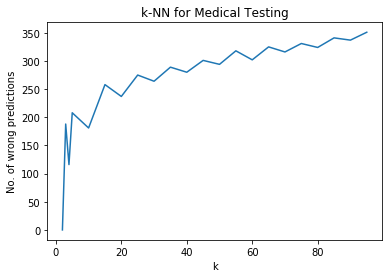

In [13]:
import matplotlib.pyplot as plt
plt.plot(x_label,y_label)
plt.xlabel('k')
plt.ylabel('No. of wrong predictions')
plt.title('k-NN for Medical Testing')
plt.show()